In [246]:
!pip install opencv-python

In [247]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [248]:
img = cv2.imread('C:/Users/ajlal/SportsPersonClassifier/model/test_images/virat_test1.jpg')
img.shape
# Now we can see that the picture have three dimesnions(x,y,z) and the third
# dimesnions is the RGB channels which stores the information of the color
# of the image. 

(1141, 1080, 3)

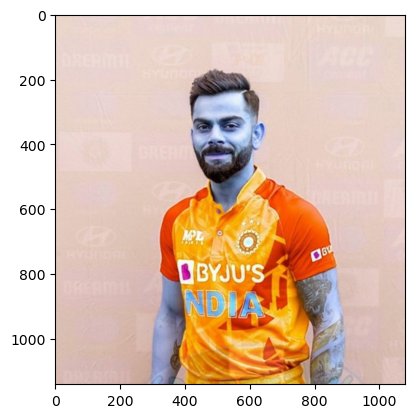

In [249]:
plt.imshow(img)
# This image is colored image with three dimesions and we do not need that
# third dimesion of colors so we can just make the image a "gray image".

In [250]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
# Now the image is in two dimensions

(1141, 1080)

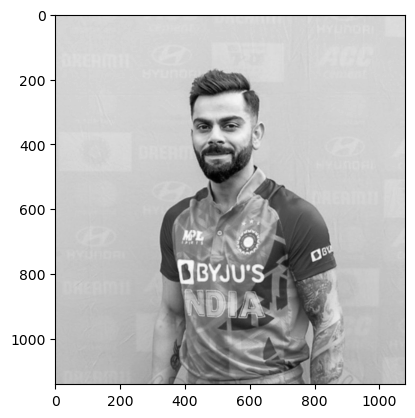

In [251]:
plt.imshow(gray, cmap='gray')
# The color has been removed and it is a two dimensional picture. 

In [252]:
gray
# We can see that now the gray image is a two dimensional aray. 

array([[214, 214, 214, ..., 216, 217, 217],
       [214, 214, 214, ..., 217, 217, 217],
       [214, 214, 214, ..., 217, 217, 217],
       ...,
       [194, 194, 193, ..., 193, 194, 195],
       [194, 194, 193, ..., 193, 194, 195],
       [194, 194, 193, ..., 193, 194, 195]], dtype=uint8)

In [253]:
# We can use the OpenCV Haar feature-based cascade classifiers(Haar-cascade) to detect
# different features of face e.g., left eye, nose, right eye etc. I have added
# a folder containing all the xml files for detecting different face feautures.

In [254]:
face_cascade = cv2.CascadeClassifier('C:/users/ajlal/SportsPersonClassifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/users/ajlal/SportsPersonClassifier/model/opencv/haarcascades/haarcascade_eye.xml')

# We will just detect faces using the face-cascade and it will return the
# faces in the form of arrays. We can see that it has returned only one array 
# which means the picture only contained one face. 
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[386, 257, 226, 226]])

In [255]:
(x, y, w, h) = faces[0]
x,y,w,h

(386, 257, 226, 226)

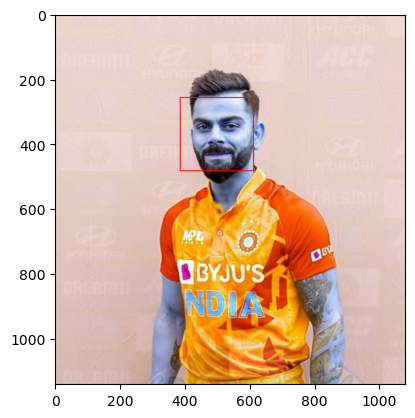

In [256]:
# Now lets draw the face that the face-cascade has detected and the face below is
# very clealry detected. 
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

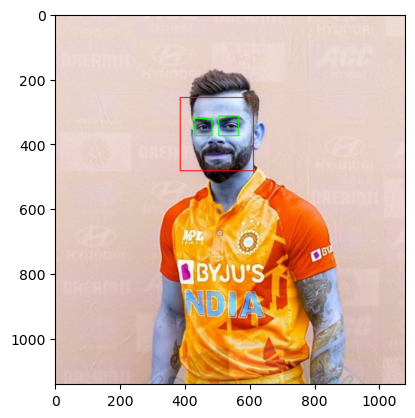

In [257]:
# Now we will detect eyes. I am copy pasting the code from the OpenCV documention. 
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

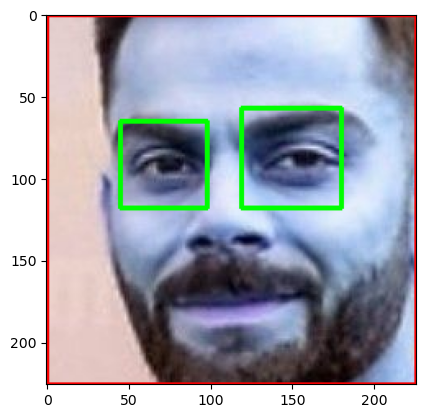

In [258]:
# We can just plot roi_color(roi=region of interest) defined in the previous snippet of code that will
# plot the only the detected regions i.e., face and eyes. 
%matplotlib inline 
plt.imshow(roi_color, cmap='gray')

In [259]:
cropped_img = np.array(roi_color)
cropped_img.shape

(226, 226, 3)

In [261]:
# We will use the wavelet-transformed image later in our model training. 
# In wavelet transformed image, you can see edges clearly and that can give us 
# clues on various facial features such as eyes, nose, lips etc
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

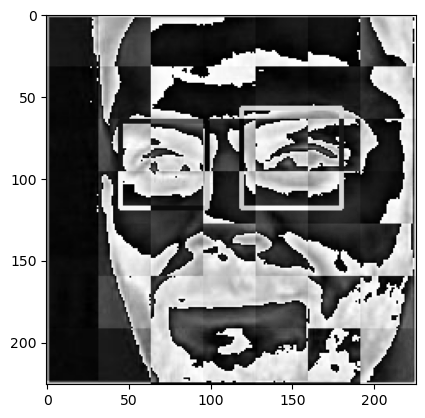

In [262]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [263]:
# Now we will be detecting faces from all the images of our dataset and then
# saving all of these cropped images in a different folder to use them for our
# machine learning model training. 

In [264]:
# Now we will write a function that can do the same work that we have done above
# to all the images in our dataset. 

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color # return cropped face if eyes are clearly visible.
                              

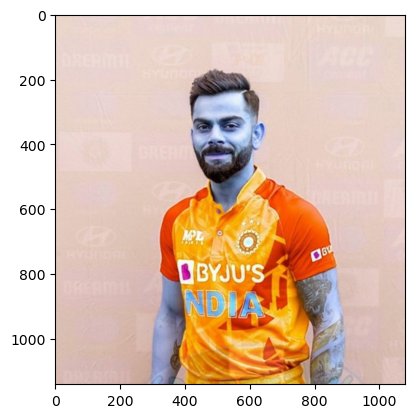

In [265]:
original_image = cv2.imread('C:/Users/ajlal/SportsPersonClassifier/model/test_images/virat_test1.jpg')
plt.imshow(original_image)

In [266]:
# Now lets see if our function is working or not because we want our function
# return the face if two eyes are detected in face which means we dont want 
# blurry or side posed images. 

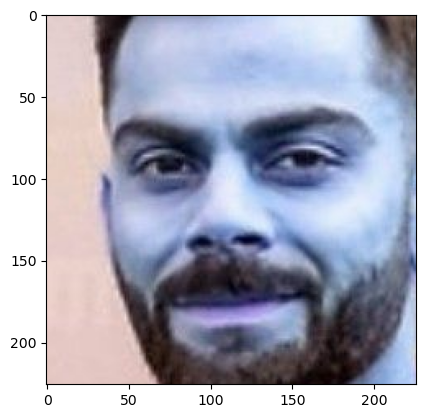

In [267]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/ajlal/SportsPersonClassifier/model/test_images/virat_test1.jpg')
plt.imshow(cropped_image)

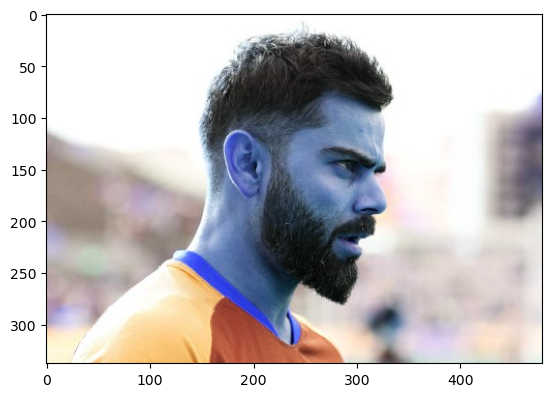

In [268]:
original_image = cv2.imread('C:/Users/ajlal/SportsPersonClassifier/model/test_images/virat_test2.jpg')
plt.imshow(original_image)

In [269]:
cropped_image_2 = get_cropped_image_if_2_eyes('C:/Users/ajlal/SportsPersonClassifier/model/test_images/virat_test2.jpg')
cropped_image_2
# It does not return aything which means that our fucntion is working fine as
# it is not returning the cropped image because two eyes were not detected. 

In [176]:
path_to_data = 'C:/Users/ajlal/SportsPersonClassifier/model/dataset/'
path_to_cr_data = 'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/'

In [270]:
# To get all the directories of our dataset foloders.
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [271]:
img_dirs

['C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped',
 'C:/Users/ajlal/SportsPersonClassifier/model/dataset/lional_messi',
 'C:/Users/ajlal/SportsPersonClassifier/model/dataset/maria_sharapova',
 'C:/Users/ajlal/SportsPersonClassifier/model/dataset/muhammad_ali',
 'C:/Users/ajlal/SportsPersonClassifier/model/dataset/serena_williams',
 'C:/Users/ajlal/SportsPersonClassifier/model/dataset/virat_kohli']

In [272]:
# Now we are creating the cropped folder in the dataset directory.
import shutil 
if os.path.exists(path_to_cr_data): # this line will delete any old folders
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) # it will create a new one

In [273]:

# We will iterate through these image directories and get the celeb. names and then
# we will interate through all the images to get cropped images using our fucntion.


cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            
              # create a new folder if already not there.
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
              # Renaming the cropped pics for simplicty like mess1.png, messi2.png....
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
              # Now save the roi_color into the cropped_file_path
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
    

Generating cropped images in folder:  C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi
Generating cropped images in folder:  C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/maria_sharapova
Generating cropped images in folder:  C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/muhammad_ali
Generating cropped images in folder:  C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/serena_williams
Generating cropped images in folder:  C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/virat_kohli


In [328]:
# Now we are manually checking if everything is fine in our dictionary and
# deleting some unwanted pictures manually from the cropped folders. 
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lional_messi': ['C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi1.png',
  'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi10.png',
  'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi11.png',
  'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi12.png',
  'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi13.png',
  'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi14.png',
  'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi15.png',
  'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi16.png',
  'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi17.png',
  'C:/Users/ajlal/SportsPersonClassifier/model/dataset/cropped/lional_messi\\lional_messi18.png',
  'C:

In [329]:
# We will vertically stack the raw and wavelet-transformed images before 
# training our model because wavelet-transformed image contains a lot of
# useful information for our machine to read. 

In [330]:
# X is our combined image and y would be th celebrity name and we cannot put
# celebrity name idirectly in the our model so we will assign a number to each
# celebrity name. 
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lional_messi': 0,
 'maria_sharapova': 1,
 'muhammad_ali': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [331]:
X, y = [], []

# Iterating though all the cropped image folders.
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files: # iterating through all the images in folders.
        img = cv2.imread(training_image)
        if img is None: # We manually deleted some images so the code was giving error.
            continue
        # scaling the images to standardize the size.
        scalled_raw_img = cv2.resize(img, (32, 32))
        # To get a wavelet-tranformed image of the same picture with same dimension.
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        # Using numPy to vertically stack the images.
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [332]:
len(X)

172

In [333]:
32*32*3 + 32*32

4096

In [334]:
X[0]

array([[10],
       [10],
       [10],
       ...,
       [ 0],
       [ 0],
       [ 2]], dtype=uint8)

In [335]:
y[0]

0

In [336]:
# We are just converting the integer to the float to avoid any errors during the
# model training. 
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(172, 4096)

In [337]:
X[0]

array([10., 10., 10., ...,  0.,  0.,  2.])

In [338]:
# Model Training
# We will use Support Vector Machine as our classifier.

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [351]:
pipe.score(X_test, y_test)

0.8888888888888888

In [352]:
print(classification_report(y_test, pipe.predict(X_test)))

# precison means how many retrieved items are relevant
# recall means how many relevant items are retrieved 


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.60      1.00      0.75         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.89        18
   macro avg       0.92      0.91      0.90        18
weighted avg       0.93      0.89      0.90        18



In [353]:
# Now we will use GridSearchCV for hyperparamter tuning with different models. 
# with the help of skleanr GridSearchCV to come up with best model and score. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

model_params = {
    'logistic_regression':{
        'model':LogisticRegression(max_iter=1000),
        'parameters':{
            'logisticregression__C':[1,5,10]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'parameters':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
      },
    'svm':{
        'model':SVC(gamma='auto', probability=True),
        'parameters':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf', 'linear']
        }
      }
}

scores = []
best_estimators = {}
import pandas as pd
for model_name, mp in model_params.items():
    try:
        pipe = make_pipeline(StandardScaler(), mp['model'])
        classifier = GridSearchCV(pipe,mp['parameters'], cv=5, return_train_score=False)
        classifier.fit(X_train,y_train)
        scores.append({
        'Model':model_name,
        'Best_Score' :classifier.best_score_,
        'Best_Parameters':classifier.best_params_
    })
        best_estimators[model_name] = classifier.best_estimator_
    except Exception as e:
        print(f"Error for model {model_name}: {str(e)}")

In [354]:
scores

[{'Model': 'logistic_regression',
  'Best_Score': 0.8703225806451613,
  'Best_Parameters': {'logisticregression__C': 10}},
 {'Model': 'random_forest',
  'Best_Score': 0.689247311827957,
  'Best_Parameters': {'randomforestclassifier__n_estimators': 5}},
 {'Model': 'svm',
  'Best_Score': 0.8638709677419355,
  'Best_Parameters': {'svc__C': 1, 'svc__kernel': 'linear'}}]

In [355]:
df_scores = pd.DataFrame(scores, columns=['Model', 'Best_Score', 'Best_Parameters'])
df_scores
# We can see that Logistic Regression is performing well with an accuracy of
# around 85 percent and SVM with accuracy of around 85 percent.

,Model,Best_Score,Best_Parameters
0,logistic_regression,0.870323,{'logisticregression__C': 10}
1,random_forest,0.689247,{'randomforestclassifier__n_estimators': 5}
2,svm,0.863871,"{'svc__C': 1, 'svc__kernel': 'linear'}"


In [356]:
best_estimators

{'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, max_iter=1000))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))])}

In [357]:
best_estimators['svm'].score(X_test, y_test)

0.9444444444444444

In [358]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8888888888888888

In [359]:
best_estimators['random_forest'].score(X_test, y_test)

0.6666666666666666

In [360]:
# The accurancy of logistic regression on the training data was a little bit
# higher then SVM but for test data it is same for both log_regression and SVM.
# I persoanlly want to use SVM for this project. 

In [361]:
best_clf = best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 1, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

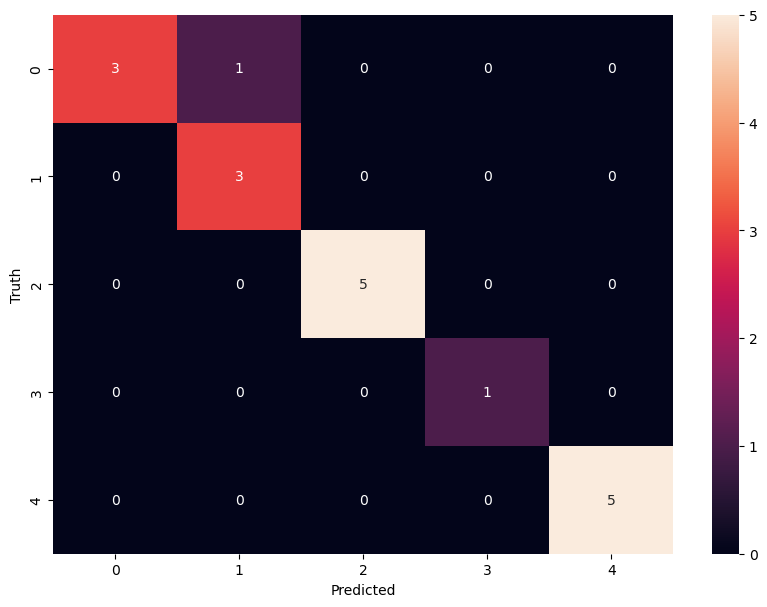

In [365]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [366]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'C:/Users/ajlal/SportsPersonClassifier/model/saved_model.pkl') 


['C:/Users/ajlal/SportsPersonClassifier/model/saved_model.pkl']

In [367]:
import json
with open("C:/Users/ajlal/SportsPersonClassifier/model/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))